In [62]:
from importlib import reload
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import sys
sys.path.insert(0, '/Users/00075868/Dropbox/AnalysisTools/')
import merger_tree_tools as mtt
import snapshot_tools as st
import halo_tools as ht
import galaxy_tools as gt
import profile_tools as pt
mtt=reload(mtt)
st=reload(st)
ht=reload(ht)
gt=reload(gt)
pt=reload(pt)

In [76]:
snap=st.SnapshotTools('/Users/00075868/Dropbox/TheThreeHundred/GadgetX/NewMDCLUSTER_0001/snap_128','SNAP2')
halo=ht.HaloTools('/Users/00075868/Dropbox/TheThreeHundred/GadgetX/NewMDCLUSTER_0001/GadgetX-NewMDCLUSTER_0001.snap_128.z0.000','AHF')

In [77]:
snap.ReadSnapshot()

Reading data from /Users/00075868/Dropbox/TheThreeHundred/GadgetX/NewMDCLUSTER_0001/snap_128
Number of particles: 0030370123
Number of particles in mass block: 0030370123


In [78]:
snap.UnitConversion(convert_to_physical=False,convert_to_littleh=False)

In [79]:
halo.ReadHaloCatalogue()

/Users/00075868/Dropbox/TheThreeHundred/GadgetX/NewMDCLUSTER_0001/GadgetX-NewMDCLUSTER_0001.snap_128.z0.000.AHF_halos


In [80]:
# Separate particles by type - dark matter (snap.dm), gas (snap.gas), stars (snap.star), and black holes (snap.bh)
snap.LoadParticlesByType('all')

In [81]:
def plot_components(pos,poscen,size,lbox,cubic=False,colourmap='plasma',grid_size=512,**kwargs):    
    if cubic==True:
        ipick=st.select_particles(pos,poscen,size,geometry='cubic',periodic=True,scale_length=lbox)
    else:
        ipick=st.select_particles(pos,poscen,size,geometry='spherical',periodic=True,scale_length=lbox)        
    dpos=pos[ipick]-poscen
    dpos=np.where(dpos>0.5*lbox,dpos-lbox,dpos)
    dpos=np.where(dpos<-0.5*lbox,dpos+lbox,dpos)    
    fig=plt.hexbin(dpos[:,0],dpos[:,2],bins='log',gridsize=grid_size,cmap=colourmap)
    return fig

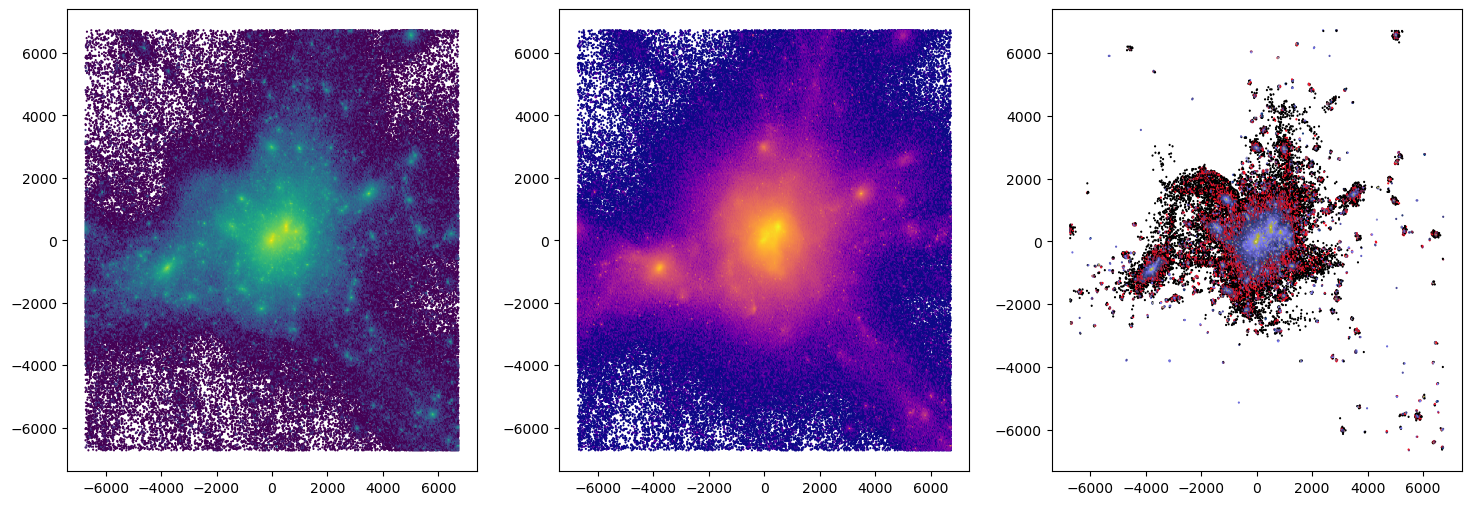

In [ ]:
ihalo=0
fig = plt.figure(figsize=(18, 6))
gs = GridSpec(nrows=1, ncols=3)
# Plot DM
ax0 = fig.add_subplot(gs[0, 0])
figd=plot_components(snap.dm.pos,halo.GroupPos[ihalo],3*halo.GroupR200[ihalo],snap.BoxSize,colourmap='viridis',grid_size=512,cubic=True)
# Plot gas
ax1 = fig.add_subplot(gs[0, 1])
figg=plot_components(snap.gas.pos,halo.GroupPos[ihalo],3*halo.GroupR200[ihalo],snap.BoxSize,colourmap='plasma',grid_size=512,cubic=True)
# Plot stars
ax2 = fig.add_subplot(gs[0, 2])
figs=plot_components(snap.star.pos,halo.GroupPos[ihalo],3*halo.GroupR200[ihalo],snap.BoxSize,colourmap='gist_stern',grid_size=512,cubic=True)


In [83]:
profiles=pt.ProfileTools()

/var/folders/5j/77cr87r17bd1d4qg5mt7bc1hp4wxl1/T/ipykernel_24402/1398806599.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(rdav/size),np.log10(rhodav/rhonorm),color='blue',label='DM')
/var/folders/5j/77cr87r17bd1d4qg5mt7bc1hp4wxl1/T/ipykernel_24402/1398806599.py:24: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(rgav/size),np.log10(rhogav/rhonorm),color='green',label='Gas (Mass)')
/var/folders/5j/77cr87r17bd1d4qg5mt7bc1hp4wxl1/T/ipykernel_24402/1398806599.py:28: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(rsav/size),np.log10(rhosav/rhonorm),color='red',label='Stars')


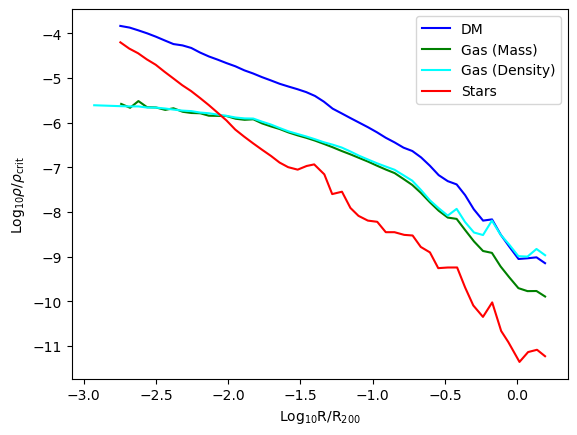

In [84]:
ihalo=0
numbins=50
radius_min=0.005*halo.GroupR200[ihalo]
radius_max=5.0*halo.GroupR200[ihalo]
radial_limits=[radius_min,radius_max]
fsize=3
size=fsize*halo.GroupR200[ihalo]
centre=halo.GroupPos[ihalo]
lbox=snap.BoxSize
rhonorm=27.755

# Get DM profile
rdav,rhodav=profiles.plot_mass_density_profile(snap.dm.pos,snap.dm.mass,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='average')

# Get gas profile
rgav,rhogav=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.mass,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='average')
rgav2,rhogmed=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.density,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='median')
rgav3,umed=profiles.plot_mass_density_profile(snap.gas.pos,snap.gas.internal_energy,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='median')

# Get star profile
rsav,rhosav=profiles.plot_mass_density_profile(snap.star.pos,snap.star.mass,centre,fsize*size,lbox,radial_limits,numbins,geometry='spherical',type='average')

plt.plot(np.log10(rdav/size),np.log10(rhodav/rhonorm),color='blue',label='DM')
plt.plot(np.log10(rgav/size),np.log10(rhogav/rhonorm),color='green',label='Gas (Mass)')
plt.plot(np.log10(rgav2/size),np.log10(rhogmed/rhonorm),color='cyan',label='Gas (Density)')
# plt.plot(np.log10(rgav2/size),np.log10(umed),color='magenta',label='Gas')

plt.plot(np.log10(rsav/size),np.log10(rhosav/rhonorm),color='red',label='Stars')
plt.xlabel(r'${\rm Log}_{10} {\rm R/R}_{200}$')
plt.ylabel(r'${\rm Log}_{10} \rho/\rho_{\rm crit}$')

plt.legend()
